<a href="https://colab.research.google.com/github/Nithyavaishu16/aiml-training-2024/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [3]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [4]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [5]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

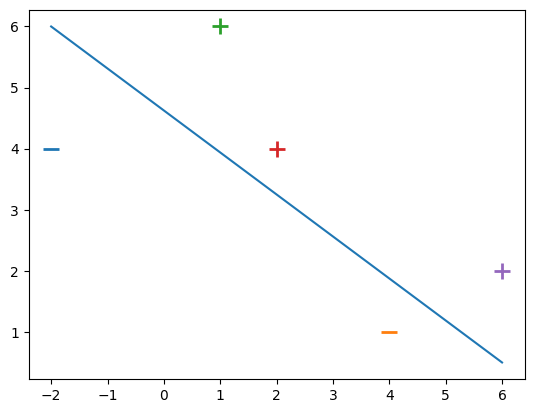

In [6]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

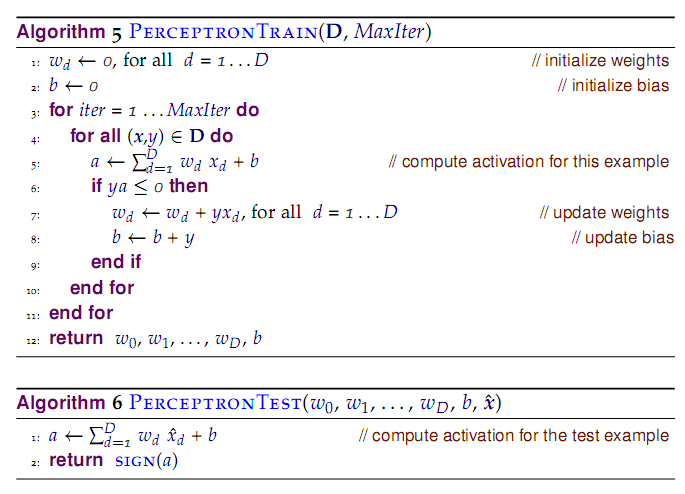

The algorithm is shown in the above image.

In [7]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [8]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

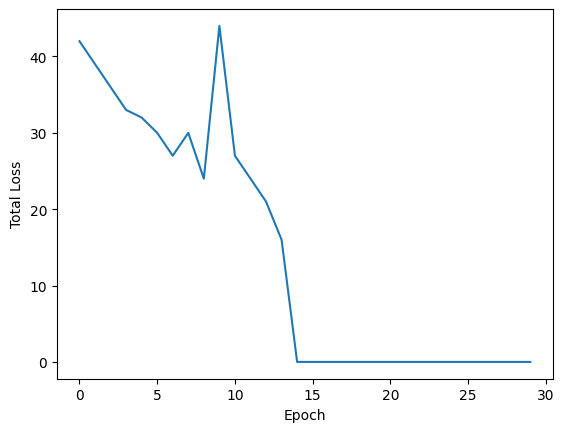

In [9]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

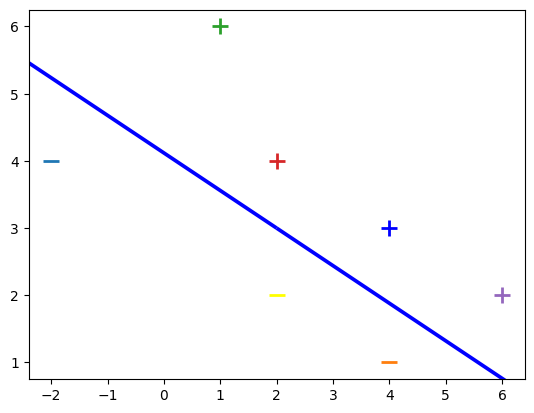

In [10]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


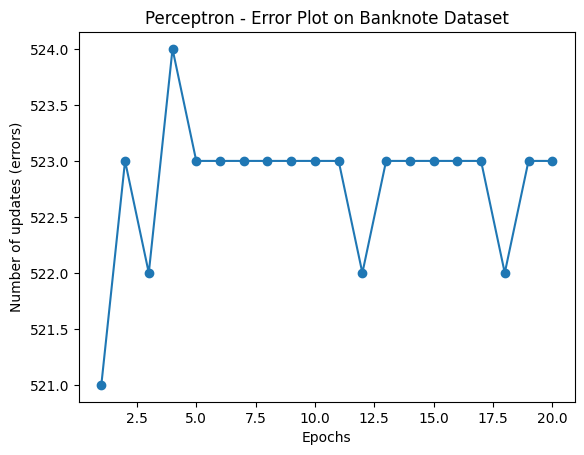

In [14]:
#1.Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load the Banknote Authentication dataset
from sklearn.datasets import fetch_openml
banknote = fetch_openml(name='Banknote-authentication', version=1)

# Split data into features and target
X = banknote.data
y = banknote.target.astype(int)  # Convert target to integer (0 and 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perceptron Training
def perceptron_train(X, y, learning_rate=0.01, n_epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    errors = []

    for epoch in range(n_epochs):
        error_count = 0
        for xi, target in zip(X, y):
            # Prediction
            update = learning_rate * (target - np.sign(np.dot(xi, weights) + bias))
            # Weight and bias updates
            weights += update * xi
            bias += update
            # Count errors
            error_count += int(update != 0.0)
        errors.append(error_count)

    return weights, bias, errors

# Train Perceptron and track errors
weights, bias, errors = perceptron_train(X_train, y_train, learning_rate=0.1, n_epochs=20)

# Plot the error over epochs
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (errors)')
plt.title('Perceptron - Error Plot on Banknote Dataset')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


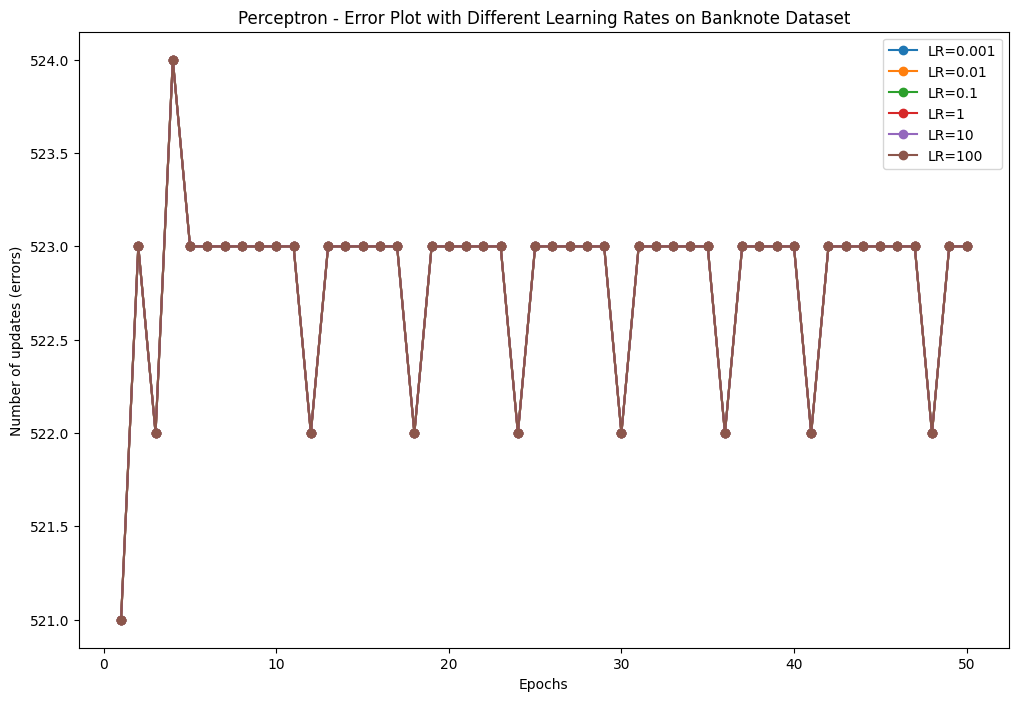

In [15]:
#2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load the Banknote Authentication dataset
banknote = fetch_openml(name='Banknote-authentication', version=1)

# Split data into features and target
X = banknote.data
y = banknote.target.astype(int)  # Convert target to integer (0 and 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perceptron Training function
def perceptron_train(X, y, learning_rate=0.01, n_epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    errors = []

    for epoch in range(n_epochs):
        error_count = 0
        for xi, target in zip(X, y):
            # Prediction
            update = learning_rate * (target - np.sign(np.dot(xi, weights) + bias))
            # Weight and bias updates
            weights += update * xi
            bias += update
            # Count errors
            error_count += int(update != 0.0)
        errors.append(error_count)

        # Early stopping if fully converged
        if error_count == 0:
            break

    return weights, bias, errors

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1, 10, 100]
n_epochs = 50

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    weights, bias, errors = perceptron_train(X_train, y_train, learning_rate=lr, n_epochs=n_epochs)
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Number of updates (errors)')
plt.title('Perceptron - Error Plot with Different Learning Rates on Banknote Dataset')
plt.legend()
plt.show()


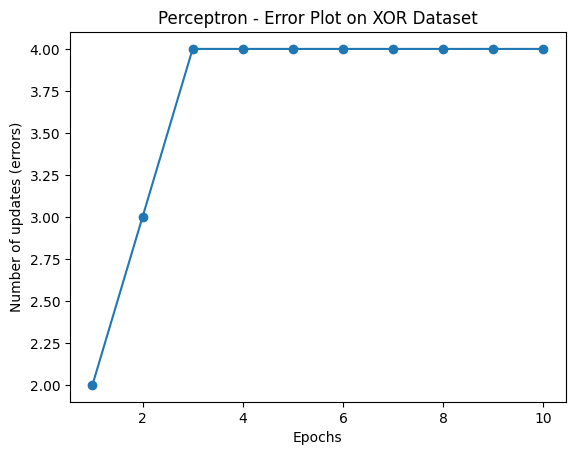

In [16]:
#3.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset (non-linearly separable)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron Training function
def perceptron_train(X, y, learning_rate=0.1, n_epochs=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    errors = []

    for epoch in range(n_epochs):
        error_count = 0
        for xi, target in zip(X, y):
            # Prediction
            update = learning_rate * (target - np.sign(np.dot(xi, weights) + bias))
            # Weight and bias updates
            weights += update * xi
            bias += update
            # Count errors
            error_count += int(update != 0.0)
        errors.append(error_count)

    return weights, bias, errors

# Train Perceptron on XOR dataset
weights, bias, errors = perceptron_train(X, y, learning_rate=0.1, n_epochs=10)

# Plot the error over epochs
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (errors)')
plt.title('Perceptron - Error Plot on XOR Dataset')
plt.show()


Observations:


Non-Convergence: The Perceptron will not converge on the XOR dataset because the data is not linearly separable. The error will not go to zero, and it will fluctuate across epochs.


Misclassifications: The Perceptron may oscillate between misclassifying different points in the XOR dataset, leading to a situation where it cannot find a consistent set of weights to classify all points correctly.


Error Plot: The error plot will show that the number of misclassifications does not consistently decrease to zero. Instead, it will likely show a non-zero number of errors at each epoch.

In [11]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [12]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


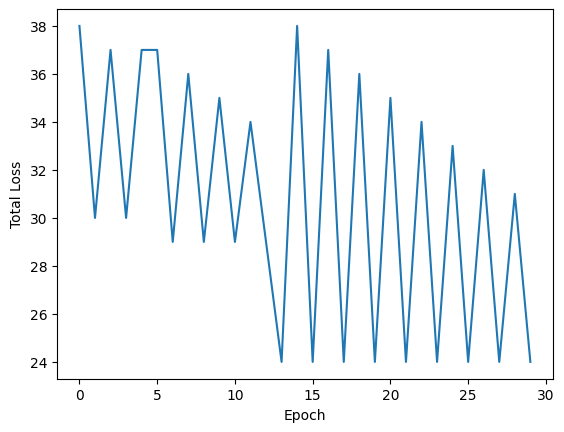

In [13]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.
ans:


i) **Yes, this dataset is learnable by a Perceptron** because the AND function is linearly separable. The Perceptron can find a linear boundary that correctly classifies the inputs \( x_1 \) and \( x_2 \) into the correct output labels \( y = - \) and \( y = + \).

ii) **Weights Update Procedure**:
1. **Initialization**: Start with weights \( w = [0, 0] \) and bias \( b = 0 \).
2. **For each data point \( (x, y) \)**:
   - Compute the predicted output: \( \hat{y} = \text{sign}(w \cdot x + b) \).
   - Calculate the error: \( \text{error} = y - \hat{y} \).
   - Update the weights: \( w \leftarrow w + \eta \cdot \text{error} \cdot x \).
   - Update the bias: \( b \leftarrow b + \eta \cdot \text{error} \).
3. **Repeat** the process until all points are classified correctly, i.e., the error is zero for all points.






2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

  ANS:
  In total, there are \( 2^{(2^2)} = 16 \) possible distinct boolean functions over a 2-bit binary input. Among these, **11 of them are learnable by a Perceptron**. These learnable functions are linearly separable, meaning there exists a linear boundary that can perfectly separate the outputs \( y = - \) and \( y = + \).

**5 functions** are not learnable by a Perceptron because they are not linearly separable. These non-learnable functions include the XOR, XNOR, and certain parity functions. Here are their truth tables:

### 1. XOR (Exclusive OR):
| \( x_1 \) | \( x_2 \) | \( y \) |
|:---:|:---:|:---:|
|  0  |  0  |  -  |
|  0  |  1  |  +  |
|  1  |  0  |  +  |
|  1  |  1  |  -  |

### 2. XNOR (Exclusive NOR):
| \( x_1 \) | \( x_2 \) | \( y \) |
|:---:|:---:|:---:|
|  0  |  0  |  +  |
|  0  |  1  |  -  |
|  1  |  0  |  -  |
|  1  |  1  |  +  |

### 3. Function where \( y \) is \( + \) for only one specific input (e.g., \( x_1=0, x_2=1 \)):
| \( x_1 \) | \( x_2 \) | \( y \) |
|:---:|:---:|:---:|
|  0  |  0  |  -  |
|  0  |  1  |  +  |
|  1  |  0  |  -  |
|  1  |  1  |  -  |

### 4. Function where \( y \) is \( - \) for only one specific input (e.g., \( x_1=1, x_2=1 \)):
| \( x_1 \) | \( x_2 \) | \( y \) |
|:---:|:---:|:---:|
|  0  |  0  |  +  |
|  0  |  1  |  +  |
|  1  |  0  |  +  |
|  1  |  1  |  -  |

### 5. A function with alternating outputs, e.g., for inputs in the sequence \( (0,0), (1,0), (0,1), (1,1) \):
| \( x_1 \) | \( x_2 \) | \( y \) |
|:---:|:---:|:---:|
|  0  |  0  |  +  |
|  0  |  1  |  -  |
|  1  |  0  |  +  |
|  1  |  1  |  -  |

These functions are not linearly separable, meaning a single linear boundary cannot correctly classify all input-output pairs. As a result, the Perceptron algorithm cannot learn these functions.